In [2]:
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(1)

rna_embeddings = np.loadtxt('./output/sce_10xPBMC_rna_skip_referenced_random_right_path_embeddings.txt')
atac_embeddings = np.loadtxt('./output/sce_10xPBMC_atac_skip_referenced_random_right_path_embeddings.txt')
print(rna_embeddings.shape)
print(atac_embeddings.shape)
embeddings =  np.concatenate((rna_embeddings, atac_embeddings))
print(embeddings.shape)
embeddings=np.nan_to_num(embeddings)
tsne_results = TSNE(perplexity=30, n_iter = 1000).fit_transform(embeddings)
tsne_results.shape
df = pd.DataFrame()
df['tSNE1'] = tsne_results[:,0]
df['tSNE2'] = tsne_results[:,1]
print("done")


(30305, 64)
(30305, 64)
(60610, 64)


/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


done


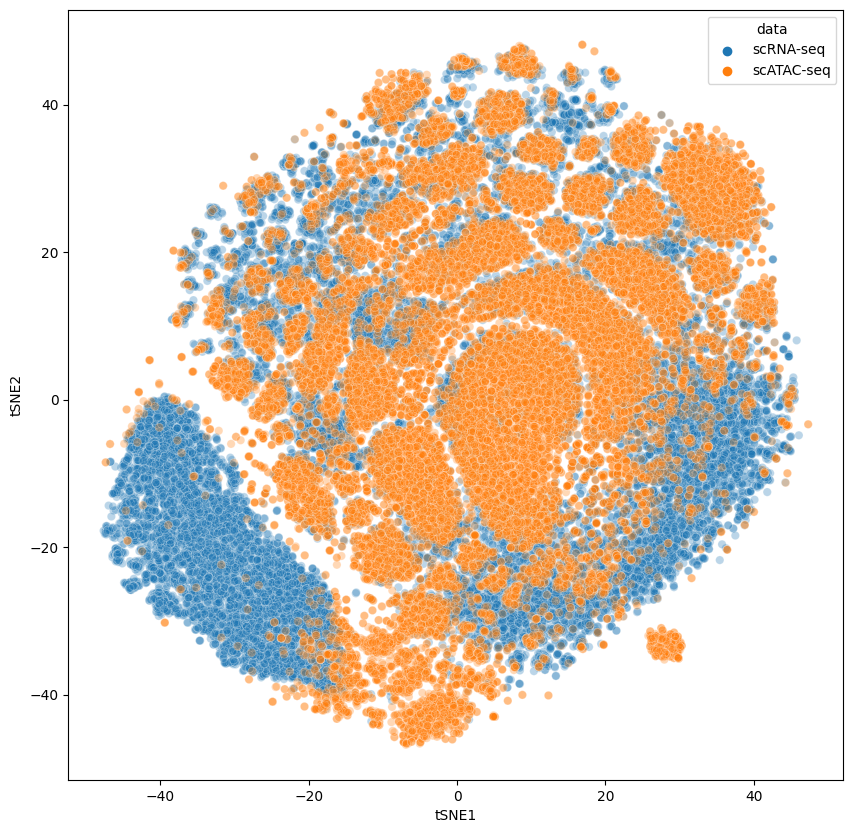

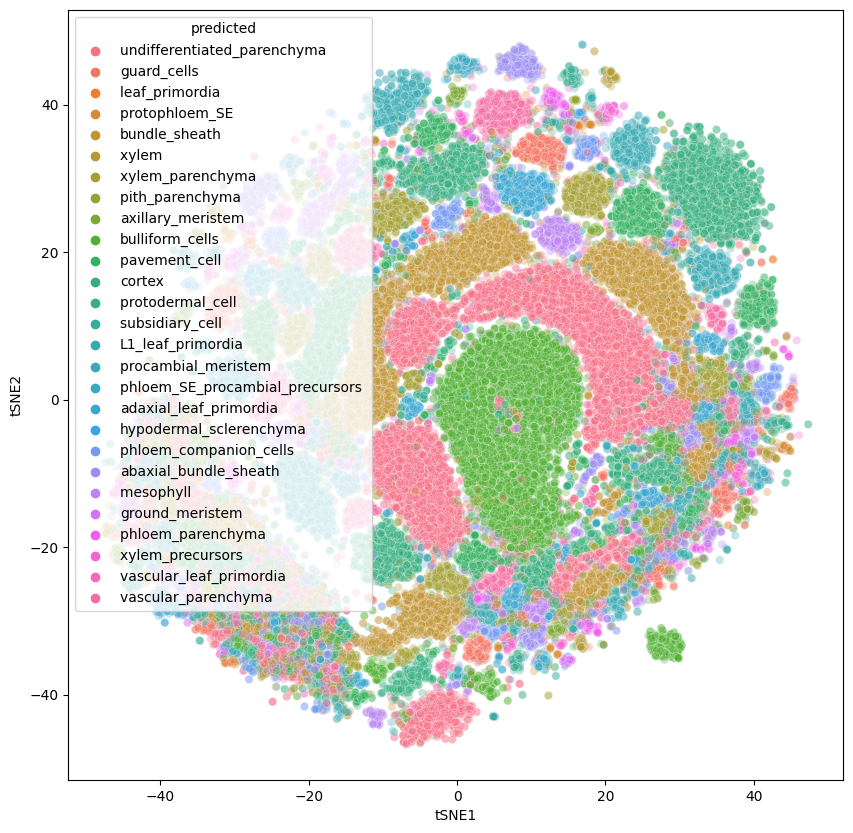

In [3]:
#print(df)
rna_labels = np.loadtxt('./data/maize_leaf_harmony_integrated.v3.subLEIDEN.metadata_fixed.txt')
atac_predictions = np.loadtxt('./output/sce_10xPBMC_atac_skip_referenced_random_right_path_knn_predictions.txt')
labels =  np.concatenate((rna_labels, atac_predictions))
#print(df.shape)
#print(len(rna_labels))
#print(len(atac_predictions))
#print(len(labels))
label_to_idx = pd.read_csv('./data/label_to_idx.txt', sep = '\t', header = None)
label_to_idx.shape
label_dic = []
for i in range(label_to_idx.shape[0]):
    label_dic = np.append(label_dic, label_to_idx[0][i][:-2])

#print(label_dic)
#print(len(label_dic))
#print(labels)
#print(label_dic[labels.astype(int)[39]])

#print(labels)
#print(len(labels))
#print(label_dic[labels.astype(int)])
#print(len(label_dic[labels.astype(int)]))
#for x in labels.astype(int):
#    print(x)
#    print(label_dic[x])

data_label = np.array(["scRNA-seq", "scATAC-seq"])
df['data'] = np.repeat(data_label, [rna_embeddings.shape[0], atac_embeddings.shape[0]], axis=0)
#print(len(labels.astype(int)))
#print(df['data'])
#print(label_dic[labels.astype(int)])
#print(len(df['data']))
#print(label_dic)
#for item in labels:
#    print(item)
#    print(label_dic[item.astype(int)])
#print(labels[1])
#print(label_dic[labels[1].astype(int)])
df['predicted'] = label_dic[labels.astype(int)-1]



plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_skip_referenced_random_right_path_1.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_skip_referenced__right_path_1.png")

In [6]:
print(df)
#print(df.loc[(df['data'] == "scRNA-seq") & (df['predicted'] == "undifferentiated_parenchyma")])

           tSNE1      tSNE2        data                     predicted
0     -23.889122  -1.618615   scRNA-seq  undifferentiated_parenchyma 
1      17.156933  32.351917   scRNA-seq  undifferentiated_parenchyma 
2     -16.377579 -12.174303   scRNA-seq  undifferentiated_parenchyma 
3     -21.162056  -4.048671   scRNA-seq  undifferentiated_parenchyma 
4      13.067743  36.817104   scRNA-seq  undifferentiated_parenchyma 
...          ...        ...         ...                           ...
60605   0.350676 -29.355125  scATAC-seq                        cortex
60606 -39.213146   6.099385  scATAC-seq                        cortex
60607   6.692050 -23.835438  scATAC-seq                 bundle_sheath
60608 -42.911121  -2.377055  scATAC-seq          procambial_meristem 
60609  17.909216 -40.977810  scATAC-seq         abaxial_bundle_sheath

[60610 rows x 4 columns]


In [31]:
#print(df[df['data'] == "scRNA-seq" & df['predicted'] == "undifferentiated_parenchyma"])
df_par=df.loc[(df['data'] == 'scRNA-seq') & (df['predicted'] == 'undifferentiated_parenchyma ')]
df_ATAC=df.loc[(df['data'] == 'scATAC-seq')]
#print(df_ATAC)
#print(df_par["tSNE1"])
dict_RNA={}
df_RNA=df_ATAC=df.loc[(df['data'] == 'scRNA-seq')]
for y in range(len(df_RNA)):
    for x in range(len(df_ATAC)):
        if df_ATAC.iloc[x,0]+0.1>=df_RNA.iloc[y,0]>=df_ATAC.iloc[x,0]-0.1 and \
            df_ATAC.iloc[x,1]+0.1>=df_RNA.iloc[y,1]>=df_ATAC.iloc[x,1]-0.1:
                if df_RNA.iloc[y,3]+"\t"+df_ATAC.iloc[x,3] in dict_RNA:
                    dict_RNA[df_RNA.iloc[y,3]+"\t"+df_ATAC.iloc[x,3]]+=1
                else:    
                    dict_RNA[df_RNA.iloc[y,3]+"\t"+df_ATAC.iloc[x,3]]=0
                #print(df_RNA.iloc[y,3]+"\t"+df_ATAC.iloc[x,3])
                #print(dict_RNA[df_RNA.iloc[y,3]+"\t"+df_ATAC.iloc[x,3]])
                
        #print(df_ATAC.iloc[x,0],df_ATAC.iloc[x,1])

KeyboardInterrupt: 

In [102]:
count=0
dict_RNA={}
for y in range(len(df_RNA)):
    #print(df_RNA.iloc[y,])
    #count+=1
    newdf = pd.DataFrame(np.repeat(df_RNA.iloc[y,], len(df_ATAC)))
    #newdf.columns = df_RNA.columns
    #print(newdf.columns)
    newdf=newdf.to_numpy().reshape(4, len(df_ATAC))
    #newdf.columns = df_RNA.columns
    #print(df_RNA.columns)
    #print(list(df_RNA.columns))
    #newdf = pd.DataFrame(newdf)
    #print(newdf.T)
    newdf = pd.DataFrame(newdf.T, columns = list(df_RNA.columns))
    #print(newdf)
    #if count==3:
    #    break
    #print(newdf['tSNE1'])
    df1 = pd.DataFrame()
    df1['dict_RNA'] = np.where(((df_ATAC['tSNE1']+0.1>=newdf['tSNE1']) & (newdf['tSNE1']>=df_ATAC['tSNE1']-0.1) &
                               (df_ATAC['tSNE2']+0.1>=newdf['tSNE2'])& (newdf['tSNE2']>=df_ATAC['tSNE2']-0.1)), newdf["predicted"]+df_ATAC["predicted"], 'False')
    #print(df_ATAC[(df_ATAC['tSNE1']+0.1>=newdf['tSNE1']) & (newdf['tSNE1']>=df_ATAC['tSNE1']-0.1)])
    #print(df1)
    #print(df1)
    df1 = df1[df1.dict_RNA != "False"]
    for item in df1["dict_RNA"]:
        #if item != "False":
        if item in dict_RNA:
            dict_RNA[item]+=1
        else:
            dict_RNA[item]=0
    #print(dict_RNA)
#print(dict_RNA)
    #if count==20:
    #    break
        
#for item in df1["dict_RNA"]:
#    if item != "False":
#        print(item)
        
#print(df1)
    
#df1['dict_RNA'] = np.where(df_ATAC['tSNE1']+0.1>=df_RNA['tSNE1']>=df_ATAC['tSNE1']-0.1 and df_ATAC['tSNE2']+0.1>=df_RNA['tSNE2']>=df_ATAC['tSNE2']-0.1, 'True', 'False')


In [104]:
print(dict_RNA)

{'undifferentiated_parenchyma undifferentiated_parenchyma ': 4416, 'undifferentiated_parenchyma phloem_parenchyma ': 16, 'guard_cellsguard_cells': 1983, 'leaf_primordia leaf_primordia ': 499, 'protophloem_SE protophloem_SE ': 1023, 'bundle_sheathbundle_sheath': 4471, 'xylem xylem ': 1396, 'xylem_parenchyma xylem_parenchyma ': 2777, 'pith_parenchyma pith_parenchyma ': 795, 'axillary_meristemaxillary_meristem': 1449, 'bulliform_cellsbulliform_cells': 3185, 'pavement_cell pavement_cell ': 2808, 'bulliform_cellsL1_leaf_primordia': 6, 'cortexcortex': 3783, 'bulliform_cellsundifferentiated_parenchyma ': 32, 'protophloem_SE bulliform_cells': 9, 'protodermal_cell protodermal_cell ': 1382, 'subsidiary_cell subsidiary_cell ': 772, 'leaf_primordia mesophyll ': 3, 'leaf_primordia guard_cells': 8, 'L1_leaf_primordiaL1_leaf_primordia': 1412, 'procambial_meristem procambial_meristem ': 2961, 'phloem_SE_procambial_precursors phloem_SE_procambial_precursors ': 1404, 'phloem_SE_procambial_precursors pro

In [105]:
for item in dict_RNA:
    print(item)

undifferentiated_parenchyma undifferentiated_parenchyma 
undifferentiated_parenchyma phloem_parenchyma 
guard_cellsguard_cells
leaf_primordia leaf_primordia 
protophloem_SE protophloem_SE 
bundle_sheathbundle_sheath
xylem xylem 
xylem_parenchyma xylem_parenchyma 
pith_parenchyma pith_parenchyma 
axillary_meristemaxillary_meristem
bulliform_cellsbulliform_cells
pavement_cell pavement_cell 
bulliform_cellsL1_leaf_primordia
cortexcortex
bulliform_cellsundifferentiated_parenchyma 
protophloem_SE bulliform_cells
protodermal_cell protodermal_cell 
subsidiary_cell subsidiary_cell 
leaf_primordia mesophyll 
leaf_primordia guard_cells
L1_leaf_primordiaL1_leaf_primordia
procambial_meristem procambial_meristem 
phloem_SE_procambial_precursors phloem_SE_procambial_precursors 
phloem_SE_procambial_precursors procambial_meristem 
phloem_SE_procambial_precursors mesophyll 
adaxial_leaf_primordiaadaxial_leaf_primordia
L1_leaf_primordiamesophyll 
hypodermal_sclerenchymahypodermal_sclerenchyma
hypoderma

In [113]:
list_cell_type=["L1_leaf_primordia","abaxial_bundle_sheath","adaxial_leaf_primordia","axillary_meristem","bulliform_cells"
,"bundle_sheath","cortex","ground_meristem","guard_cells","hypodermal_sclerenchyma","leaf_primordia","mesophyll"
,"pavement_cell","phloem_SE_procambial_precursors","phloem_companion_cells","phloem_parenchyma","pith_parenchyma"
,"procambial_meristem","protodermal_cell","protophloem_SE","subsidiary_cell","undifferentiated_parenchyma"
,"vascular_leaf_primordia","vascular_parenchyma","xylem","xylem_parenchyma","xylem_precursors"]

list_test_x=[]
list_test_y=[]
list_test_hue=[]
for item in list_cell_type:
    if item == "L1_leaf_primordia":
        for item2 in dict_RNA:
            if item2.startswith(item):
                list_test_x+=[item2[len(item)::].strip("\t")]
                list_test_y+=[dict_RNA[item2]]
                #print(item2[len(item)::].strip("\t"))

Text(0.5, 1.0, 'L1_leaf_primordia')

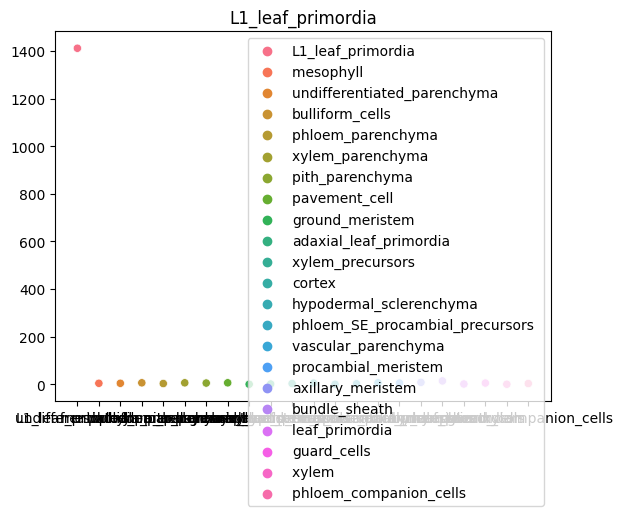

In [117]:
sns.scatterplot(
    x = list_test_x, y = list_test_y,
    hue = list_test_x,
    #data = df,
    legend = "full",
    #alpha = 0.3
).set_title("L1_leaf_primordia")

/tmp/ipykernel_62703/2570434483.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(count)


KeyError: 'ferentiated_parenchyma undifferentiated_parenchyma'

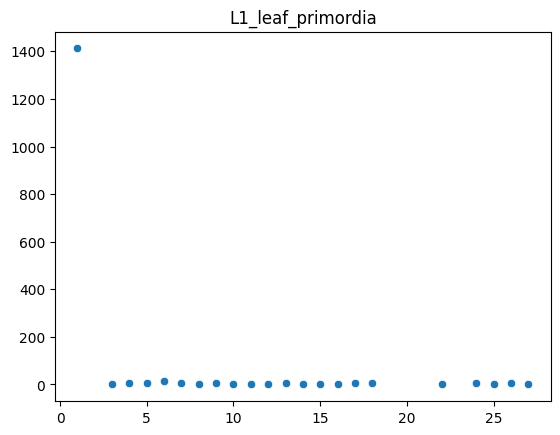

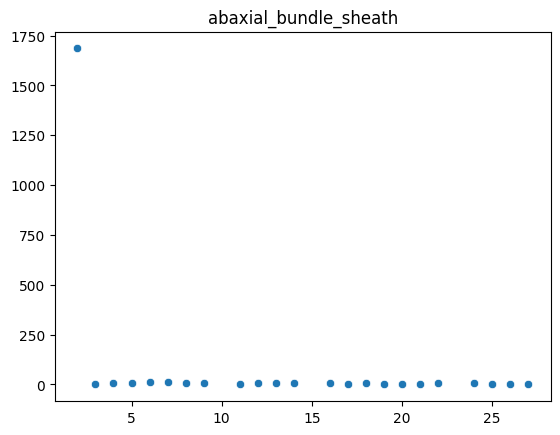

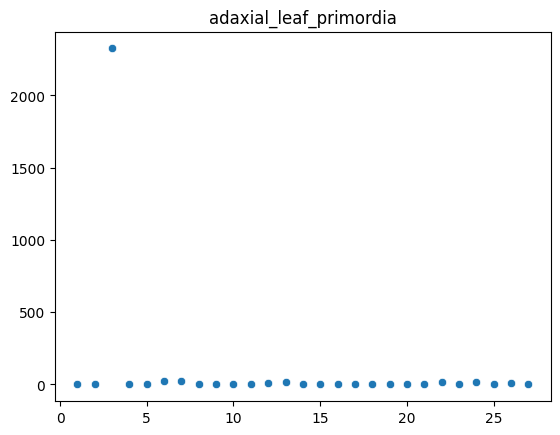

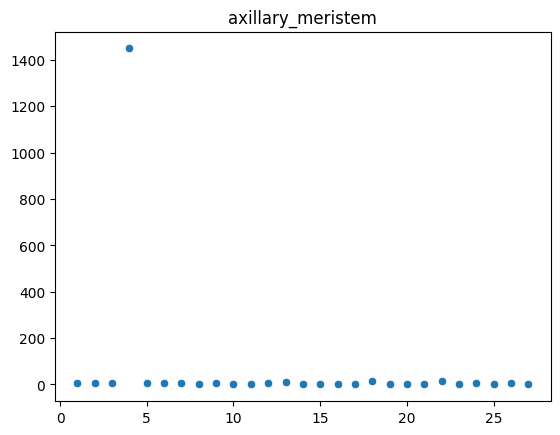

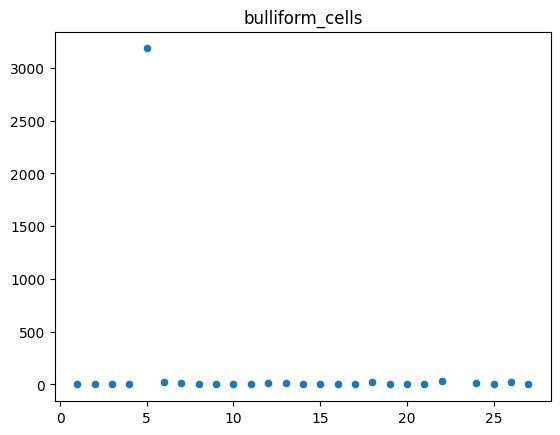

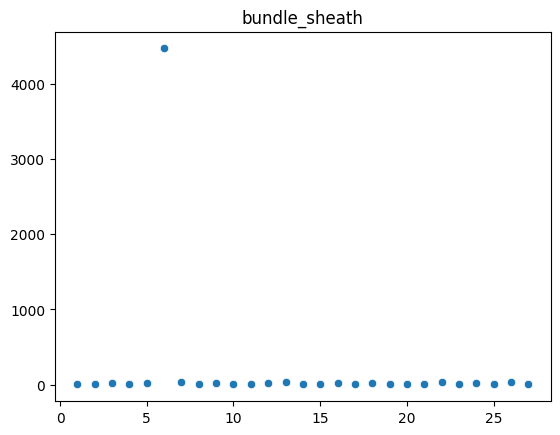

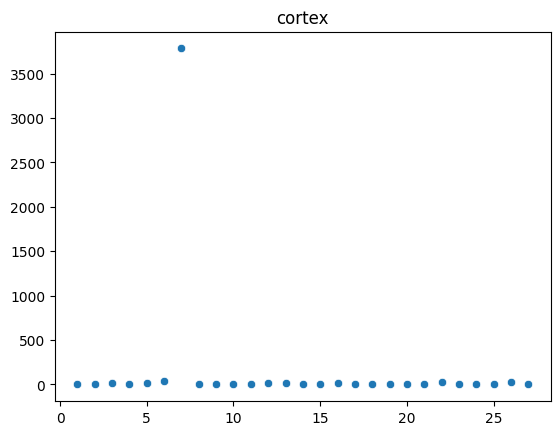

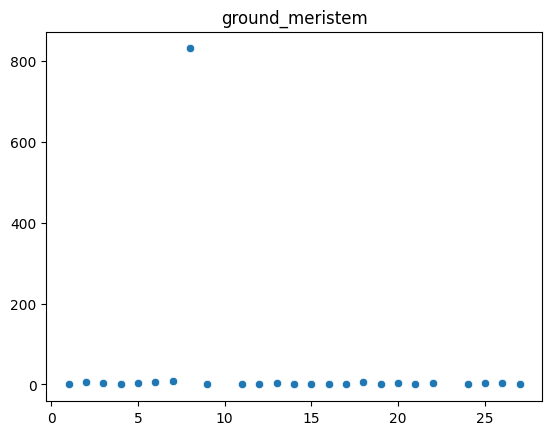

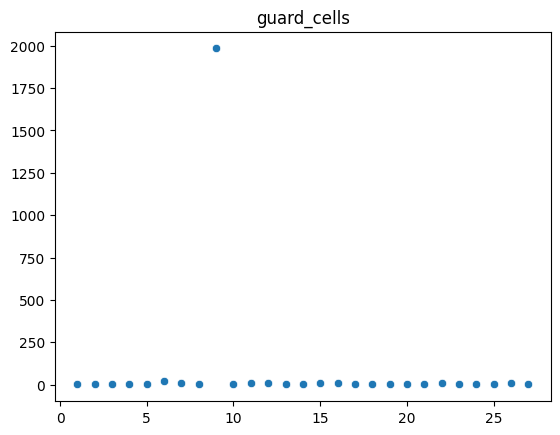

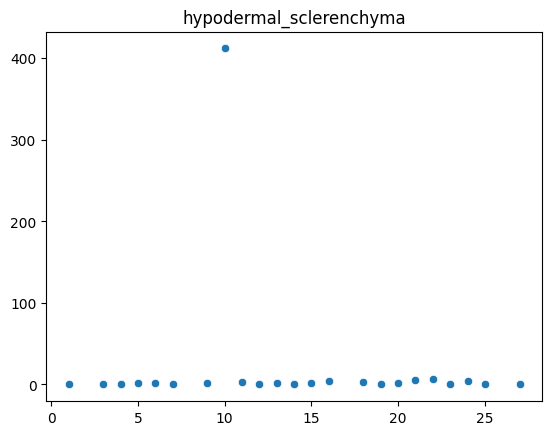

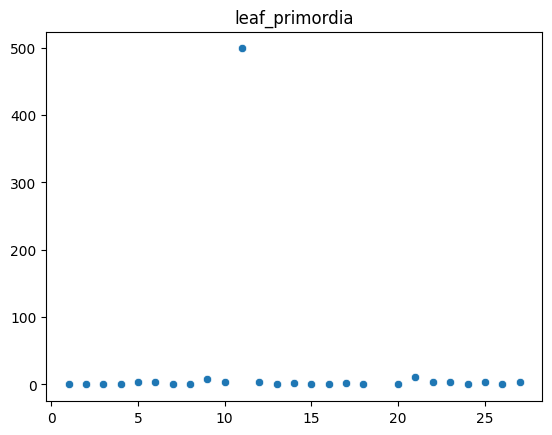

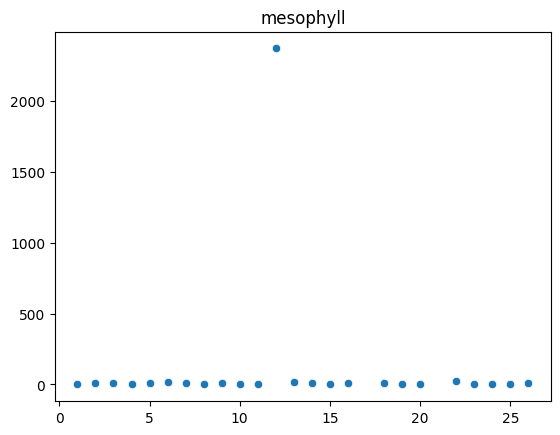

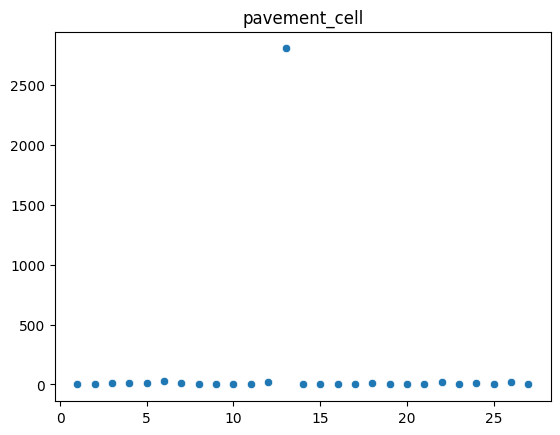

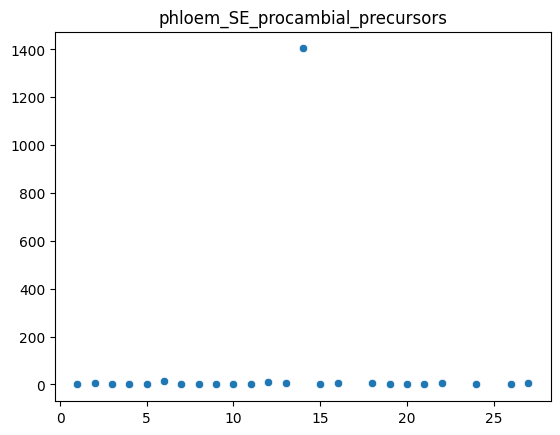

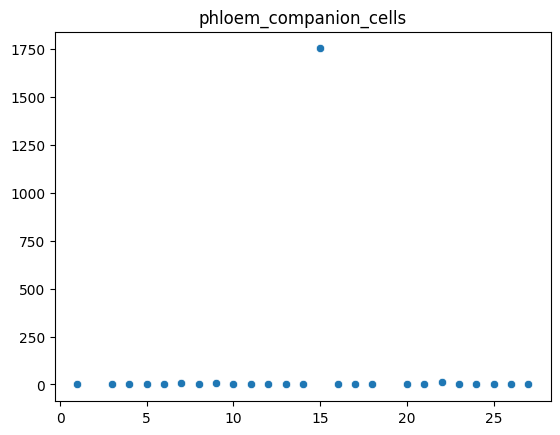

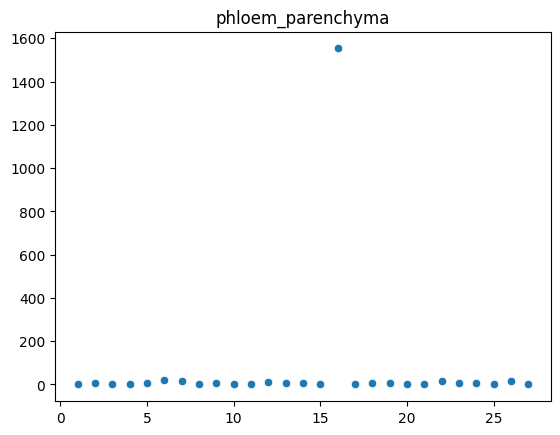

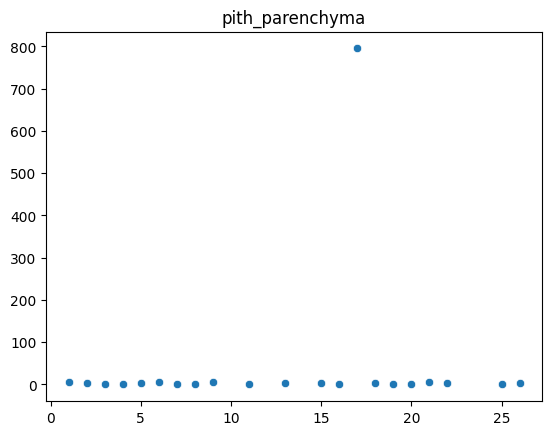

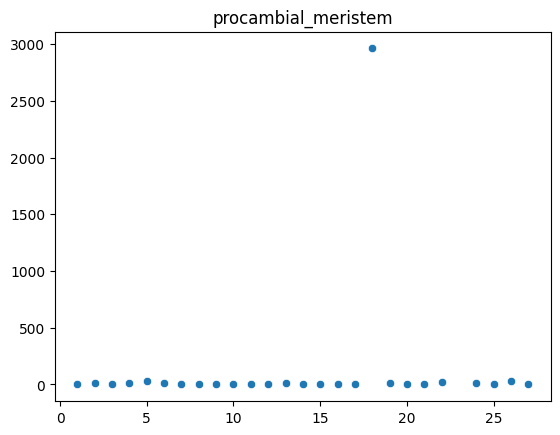

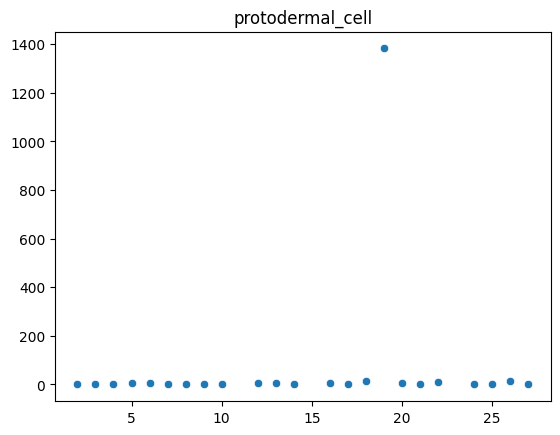

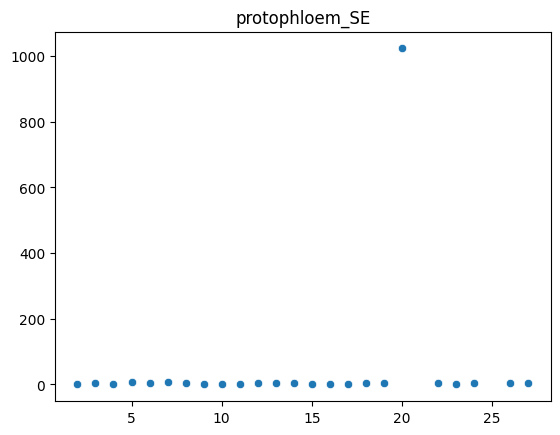

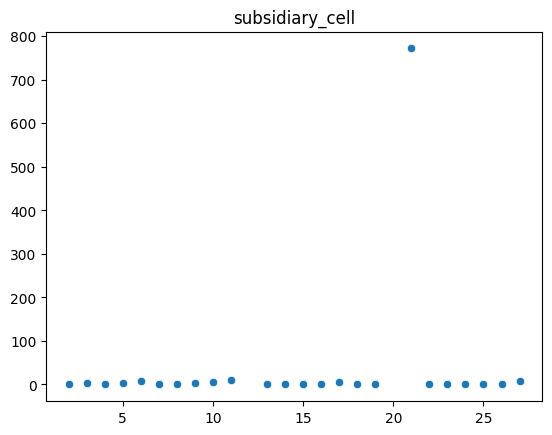

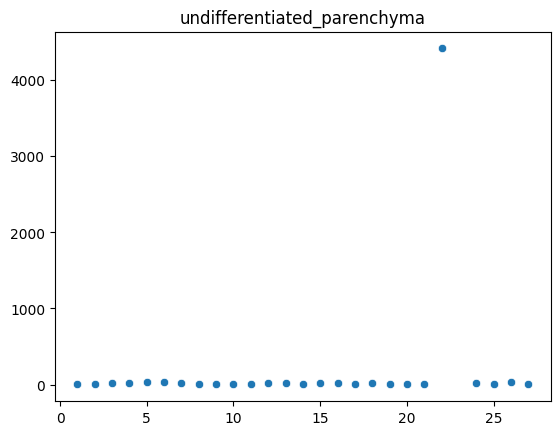

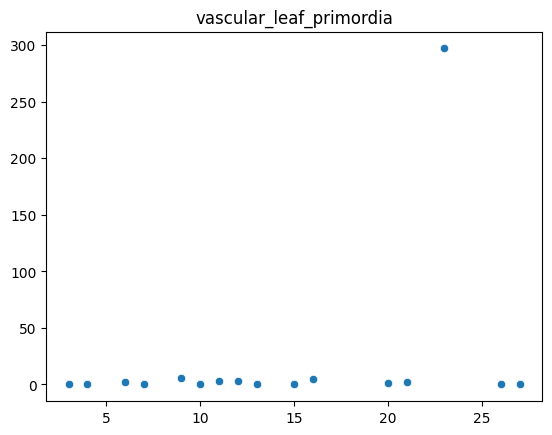

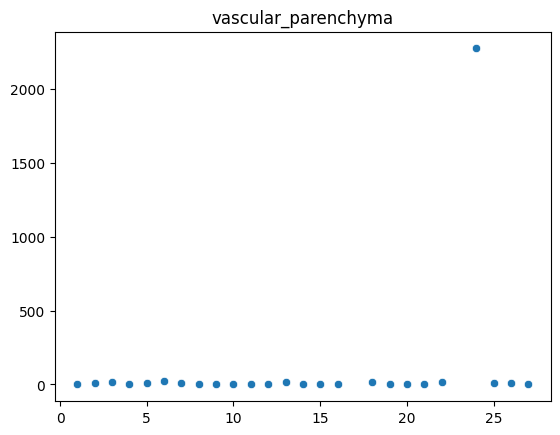

In [143]:
list_cell_type=["L1_leaf_primordia","abaxial_bundle_sheath","adaxial_leaf_primordia","axillary_meristem","bulliform_cells"
,"bundle_sheath","cortex","ground_meristem","guard_cells","hypodermal_sclerenchyma","leaf_primordia","mesophyll"
,"pavement_cell","phloem_SE_procambial_precursors","phloem_companion_cells","phloem_parenchyma","pith_parenchyma"
,"procambial_meristem","protodermal_cell","protophloem_SE","subsidiary_cell","undifferentiated_parenchyma"
,"vascular_leaf_primordia","vascular_parenchyma","xylem","xylem_parenchyma","xylem_precursors"]

#list_test_x=[]
#list_test_y=[]
#list_test_hue=[]
list_dict={}
count=0
for item in list_cell_type:
    count+=1
    list_dict[item]=count
count=0
for item in list_cell_type:
    count+=1
    list_test_x=[]
    list_test_y=[]
    for item2 in dict_RNA:
        if item == "xylem":
            if "xylem_parenchyma" in item2:
                list_test_x+=[list_dict[item2[len(item)+11::].strip(" ")]]
            elif "xylem_precursors" in item2:
                list_test_x+=[list_dict[item2[len(item)+11::].strip(" ")]]
            if "xylem_parenchyma" not in item2 and "xylem_precursors" not in item2:
                list_test_x+=[list_dict[item2[len(item)::].strip(" ")]]
                list_test_y+=[dict_RNA[item2]]
        elif item2.startswith(item):
            #print(item2[len(item)::].strip("\t"))
            list_test_x+=[list_dict[item2[len(item)::].strip(" ")]]
            list_test_y+=[dict_RNA[item2]]
                #print(item2[len(item)::].strip("\t"))
    plt.figure(count)
    sns.scatterplot(
    x = list_test_x, y = list_test_y,
    #data = df,
    legend = "full",
    #alpha = 0.3
).set_title(item)
    plt.savefig("labor_frequency_3/"+item+".png")
    #if count==2:
    #    break

In [136]:
print(list_dict)

{'L1_leaf_primordia': 1, 'abaxial_bundle_sheath': 2, 'adaxial_leaf_primordia': 3, 'axillary_meristem': 4, 'bulliform_cells': 5, 'bundle_sheath': 6, 'cortex': 7, 'ground_meristem': 8, 'guard_cells': 9, 'hypodermal_sclerenchyma': 10, 'leaf_primordia': 11, 'mesophyll': 12, 'pavement_cell': 13, 'phloem_SE_procambial_precursors': 14, 'phloem_companion_cells': 15, 'phloem_parenchyma': 16, 'pith_parenchyma': 17, 'procambial_meristem': 18, 'protodermal_cell': 19, 'protophloem_SE': 20, 'subsidiary_cell': 21, 'undifferentiated_parenchyma': 22, 'vascular_leaf_primordia': 23, 'vascular_parenchyma': 24, 'xylem': 25, 'xylem_parenchyma': 26, 'xylem_precursors': 27}


In [144]:
list_cell_type=["L1_leaf_primordia","abaxial_bundle_sheath","adaxial_leaf_primordia","axillary_meristem","bulliform_cells"
,"bundle_sheath","cortex","ground_meristem","guard_cells","hypodermal_sclerenchyma","leaf_primordia","mesophyll"
,"pavement_cell","phloem_SE_procambial_precursors","phloem_companion_cells","phloem_parenchyma","pith_parenchyma"
,"procambial_meristem","protodermal_cell","protophloem_SE","subsidiary_cell","undifferentiated_parenchyma"
,"vascular_leaf_primordia","vascular_parenchyma","xylem","xylem_parenchyma","xylem_precursors"]

list_test_x=[]
list_test_y=[]
list_test_hue=[]
for item in list_cell_type:
    if item == "bulliform_cells":
        for item2 in dict_RNA:
            if item2.startswith(item):
                #list_test_x+=[item2[len(item)::].strip("\t")]
                #list_test_y+=[dict_RNA[item2]]
                print(item2)
                print(dict_RNA[item2])
                #print(item2[len(item)::].strip("\t"))

bulliform_cellsbulliform_cells
3185
bulliform_cellsL1_leaf_primordia
6
bulliform_cellsundifferentiated_parenchyma 
32
bulliform_cellsabaxial_bundle_sheath
6
bulliform_cellsxylem_precursors 
5
bulliform_cellsadaxial_leaf_primordia
6
bulliform_cellspith_parenchyma 
3
bulliform_cellsaxillary_meristem
5
bulliform_cellsbundle_sheath
25
bulliform_cellspavement_cell 
13
bulliform_cellsxylem_parenchyma 
19
bulliform_cellsprocambial_meristem 
27
bulliform_cellscortex
16
bulliform_cellsmesophyll 
10
bulliform_cellsphloem_SE_procambial_precursors 
4
bulliform_cellsprotodermal_cell 
5
bulliform_cellsguard_cells
4
bulliform_cellsleaf_primordia 
3
bulliform_cellsphloem_parenchyma 
5
bulliform_cellsprotophloem_SE 
9
bulliform_cellsvascular_parenchyma 
10
bulliform_cellsground_meristem
3
bulliform_cellshypodermal_sclerenchyma
2
bulliform_cellssubsidiary_cell 
3
bulliform_cellsphloem_companion_cells 
3
bulliform_cellsxylem 
0


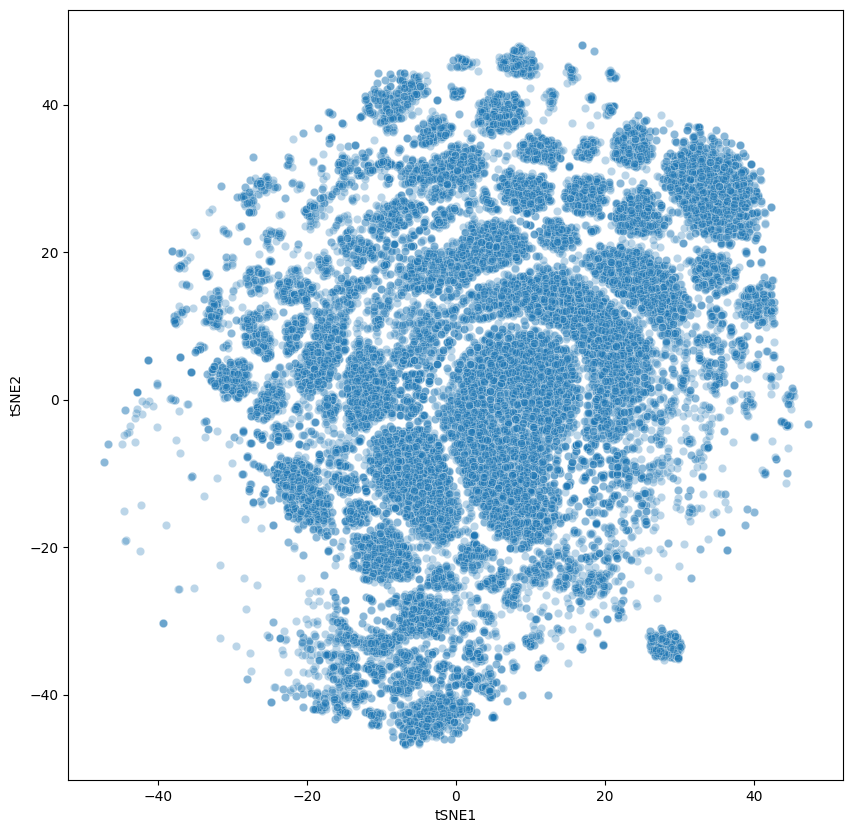

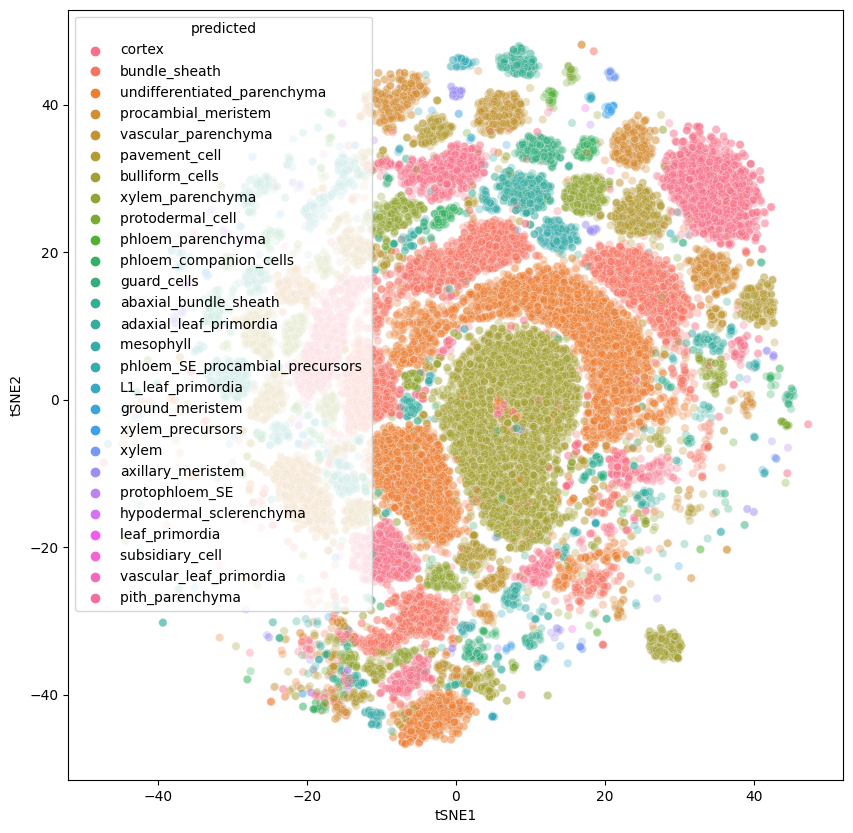

In [4]:
df_modi = df[df.data == "scATAC-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_new_random2.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_new_random2.png")

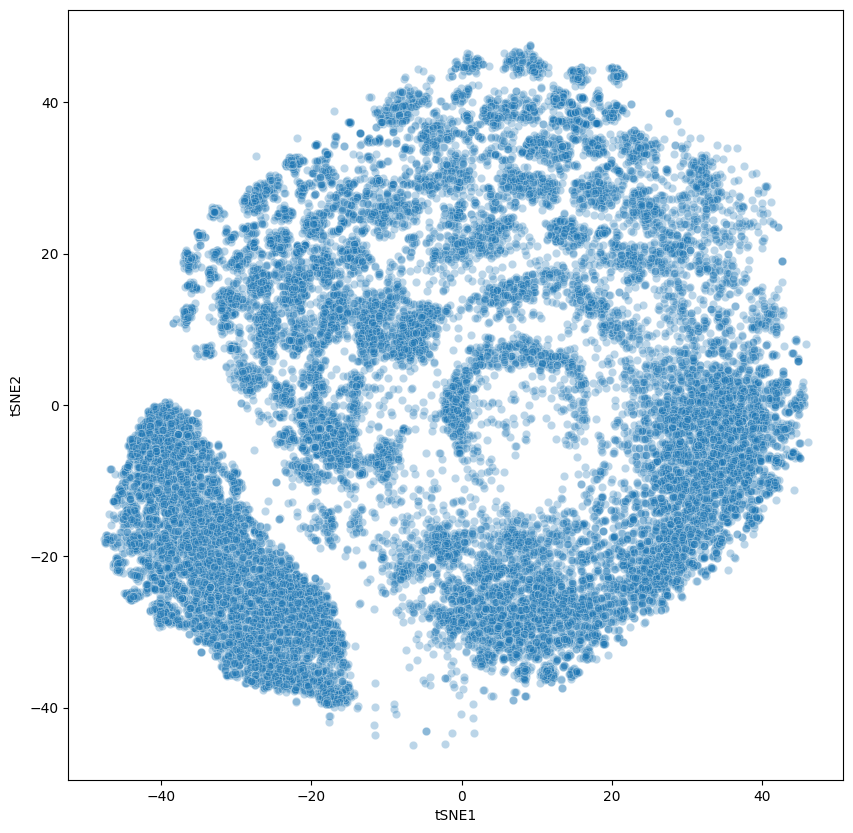

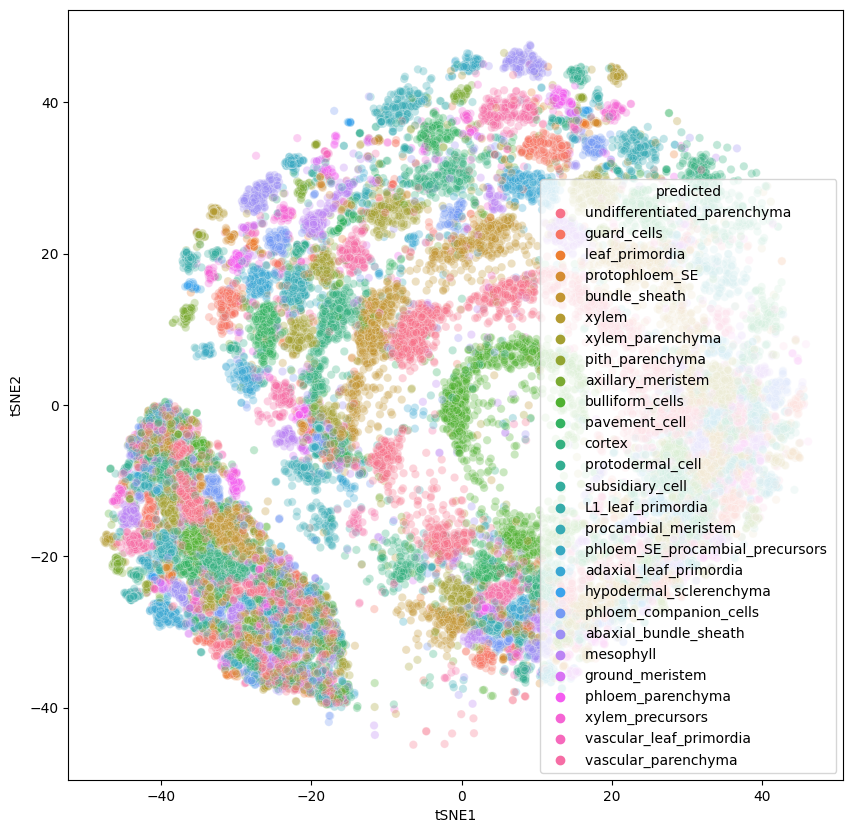

In [5]:
df_modi = df[df.data == "scRNA-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_new_random2.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_new_random2.png")